In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()


In [86]:
data = pd.read_csv('/home/hasan/DATA SET/Date data/multiTimeline.csv', skiprows=[0,1])

In [87]:
data.head()

,Month,diet: (Worldwide),gym: (Worldwide),finance: (Worldwide)
0,2004-01,100,31,48
1,2004-02,75,26,49
2,2004-03,67,24,47
3,2004-04,70,22,48
4,2004-05,72,22,43


In [88]:
data.shape

(168, 4)

# Wrangle Data

In [89]:
#changing column name
data.columns = ['month','diet','gym','finance']
data.head()

,month,diet,gym,finance
0,2004-01,100,31,48
1,2004-02,75,26,49
2,2004-03,67,24,47
3,2004-04,70,22,48
4,2004-05,72,22,43


In [90]:
#use data as index
data.month = pd.to_datetime(data.month)
data.set_index('month', inplace=True)

In [91]:
data.head()

,diet,gym,finance
month,,,
2004-01-01,100,31,48
2004-02-01,75,26,49
2004-03-01,67,24,47
2004-04-01,70,22,48
2004-05-01,72,22,43


Text(0.5, 0, 'Year')

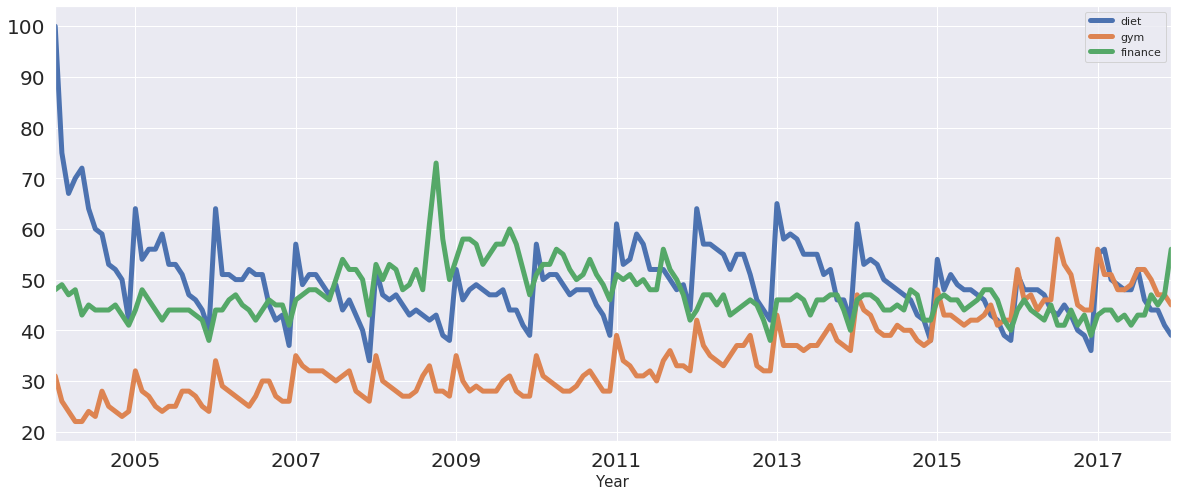

In [92]:
data.plot(figsize=(20,8), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=15)

Text(0.5, 0, 'Year')

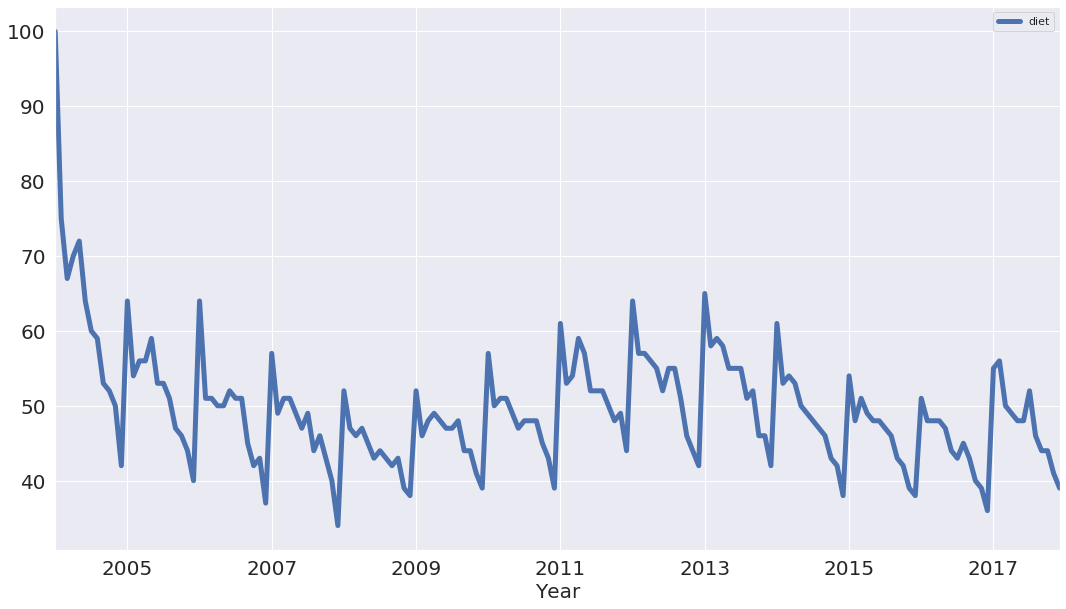

In [93]:
data[['diet']].plot(figsize=(18,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20)

Text(0, 0.5, 'Year')

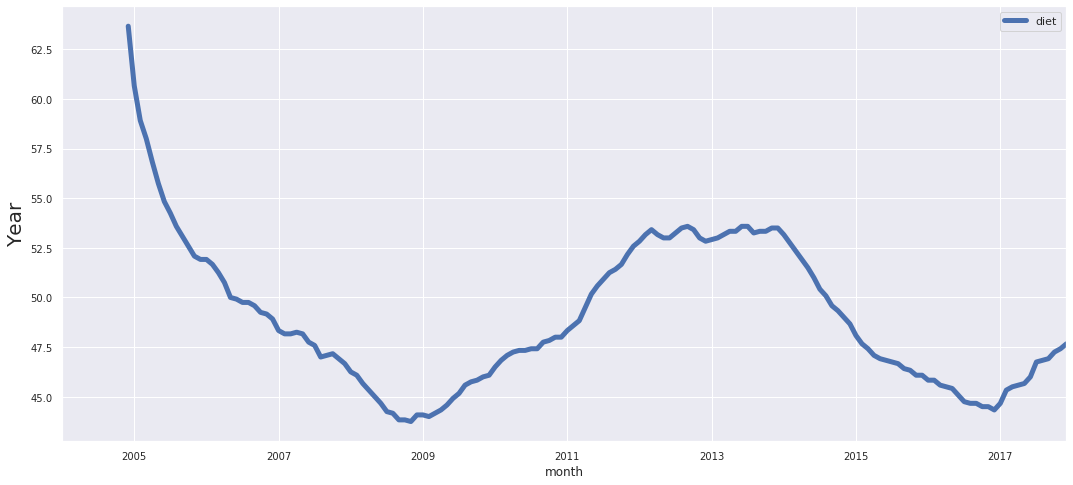

In [94]:
diet = data[['diet']]
diet.rolling(12).mean().plot(figsize=(18,8), linewidth=5, fontsize=10)
plt.ylabel('Year', fontsize=20)

Text(0.5, 0, 'year')

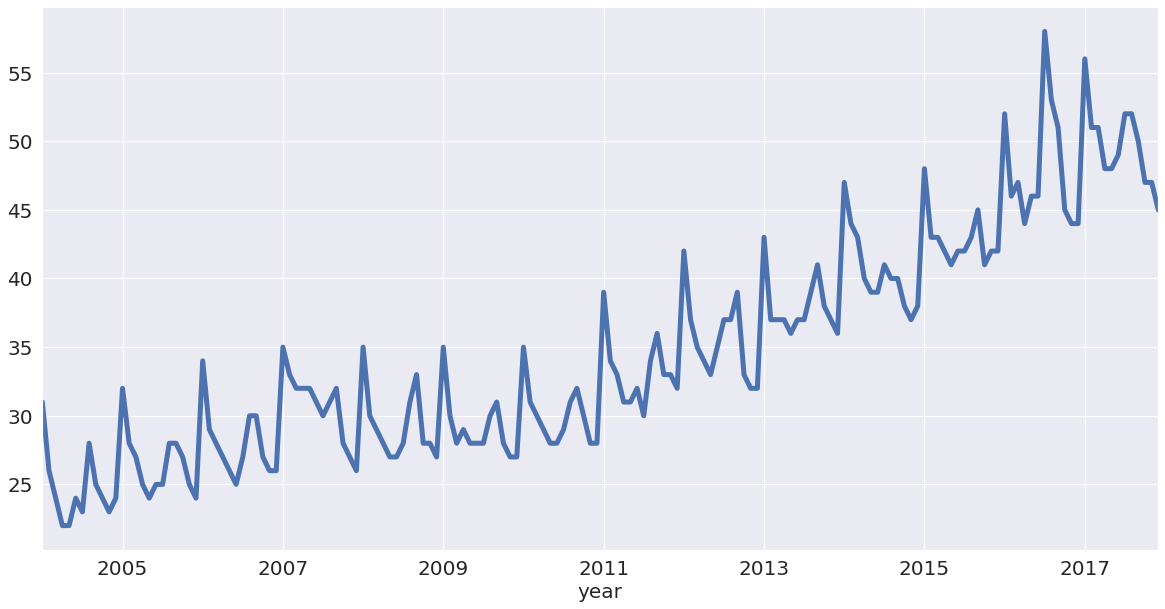

In [95]:
data['gym'].plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('year', fontsize=20)

Text(0.5, 0, 'Year')

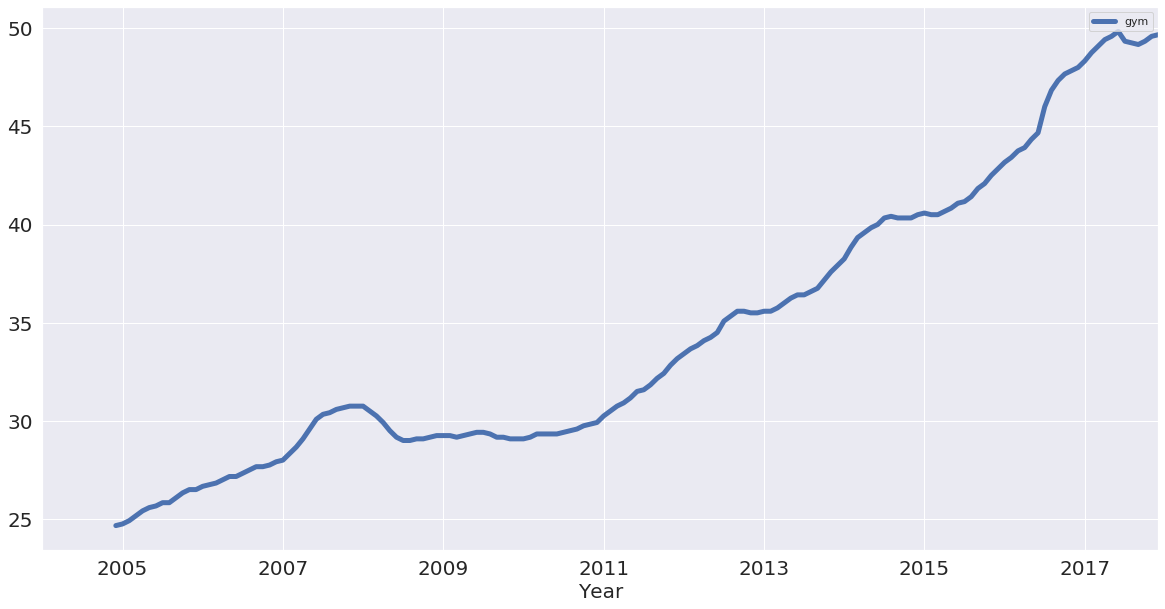

In [96]:
gym = data[['gym']]
gym.rolling(12).mean().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20)

Text(0.5, 0, 'year')

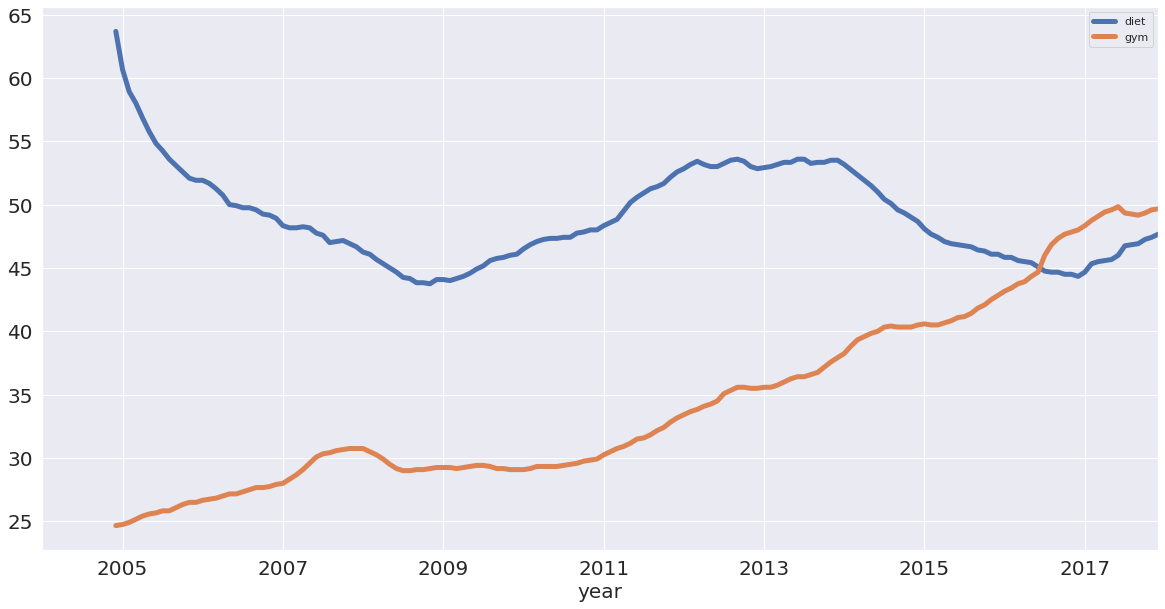

In [97]:
#printing two line together with rolling()
double_plot = pd.concat([diet.rolling(12).mean(), gym.rolling(12).mean()], axis=1)
double_plot.plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('year', fontsize=20)

Text(0.5, 0, 'year')

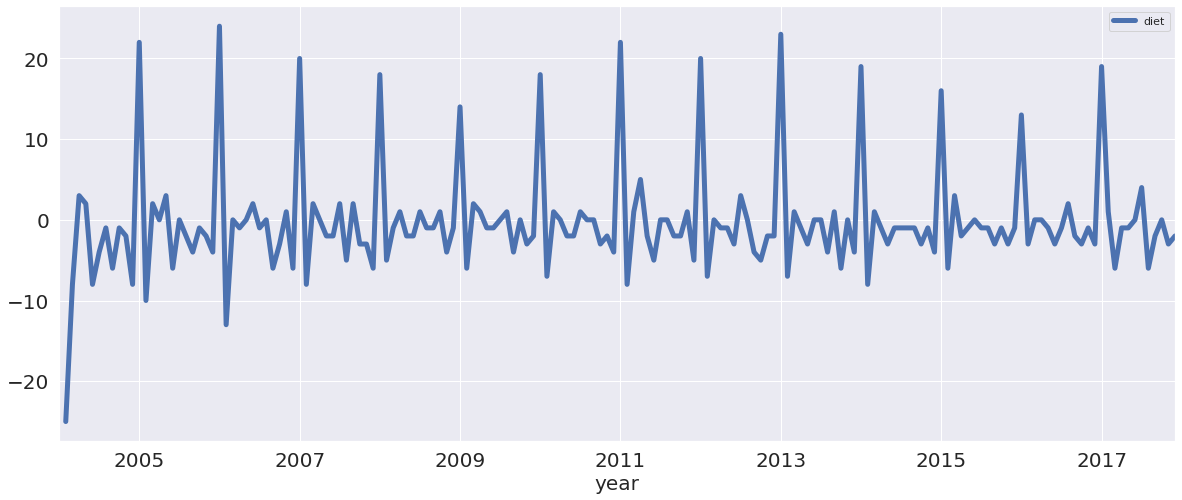

In [98]:
#first order difference
diet = data[['diet']]
diet.diff().plot(figsize=(20,8), linewidth=5, fontsize=20)
plt.xlabel('year', fontsize=20)

# Working With Iris Dataset

In [99]:
from sklearn.datasets import load_iris
iris = load_iris()

In [100]:
iris = pd.DataFrame(data=np.c_[iris['data'], iris['target']],
                   columns = iris['feature_names'] + ['target'])
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [123]:
iris.shape

(150, 5)

In [101]:
iris['target'].unique()

array([0., 1., 2.])

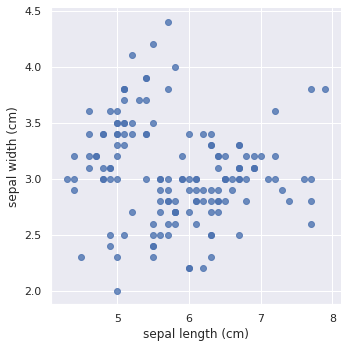

In [102]:
#relation between sepal length and sepal width
sns.lmplot(x='sepal length (cm)', y='sepal width (cm)', fit_reg=False, data=iris)

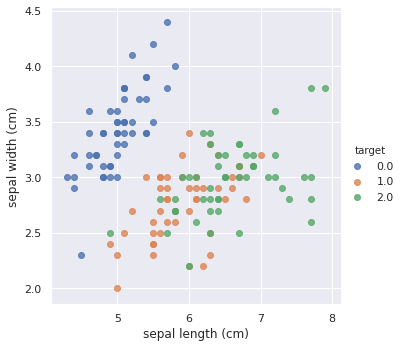

In [128]:
#relation between sepal length and sepal width with hue
sns.lmplot(x='sepal length (cm)', y='sepal width (cm)', fit_reg=False, data=iris, hue='target')

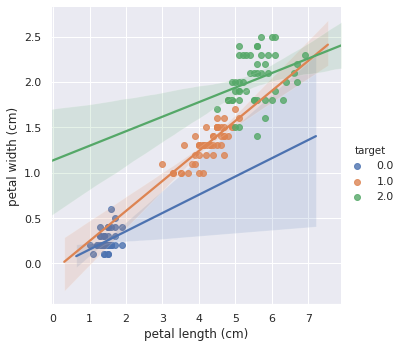

In [130]:
#relation between sepal length and sepal width with hue
sns.lmplot(x='petal length (cm)', y='petal width (cm)', fit_reg=True, data=iris, hue='target')

In [104]:
#finding correlation coefficient
iris.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
target,0.782561,-0.426658,0.949035,0.956547,1.000000


In [105]:
#correlation coefficient of grouped data
iris.groupby(['target']).corr()

sepal length (cm)  sepal width (cm)  \
target                                                          
0.0    sepal length (cm)           1.000000          0.742547   
       sepal width (cm)            0.742547          1.000000   
       petal length (cm)           0.267176          0.177700   
       petal width (cm)            0.278098          0.232752   
1.0    sepal length (cm)           1.000000          0.525911   
       sepal width (cm)            0.525911          1.000000   
       petal length (cm)           0.754049          0.560522   
       petal width (cm)            0.546461          0.663999   
2.0    sepal length (cm)           1.000000          0.457228   
       sepal width (cm)            0.457228          1.000000   
       petal length (cm)           0.864225          0.401045   
       petal width (cm)            0.281108          0.537728   

                          petal length (cm)  petal width (cm)  
target                                                         
0.0    sepal length (cm)           0.267176          0.278098  
       sepal width (cm)            0.177700          0.232752  
       petal length (cm)           1.000000          0.331630  
       petal width (cm)            0.331630          1.000000  
1.0    sepal length (cm)           0.754049          0.546461  
       sepal width (cm)            0.560522          0.663999  
       petal length (cm)           1.000000          0.786668  
       petal width (cm)            0.786668          1.000000  
2.0    sepal length (cm)           0.864225          0.281108  
       sepal width (cm)            0.401045          0.537728  
       petal length (cm)           1.000000          0.322108  
       petal width (cm)            0.322108          1.000000

Text(0.5, 0, 'index')

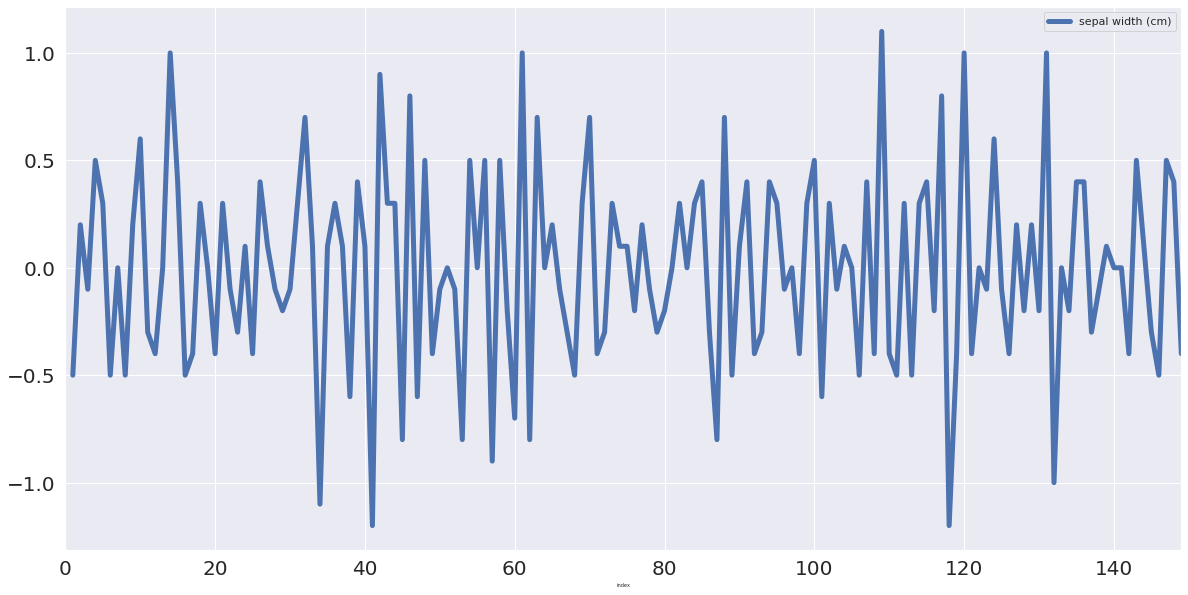

In [125]:
#first order difference
sepal_width = iris[['sepal width (cm)']]
sepal_width.diff().plot(figsize=(20,10), fontsize=20, linewidth=5)
plt.xlabel('index', fontsize=5)

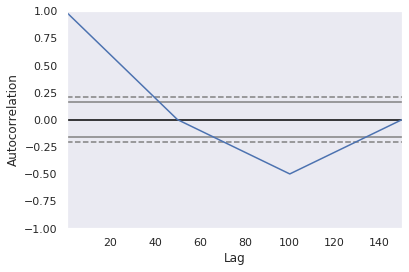

In [122]:
#auto correlation of target column 
target = iris[['target']]
pd.plotting.autocorrelation_plot(target)

Text(0.5, 0, 'year')

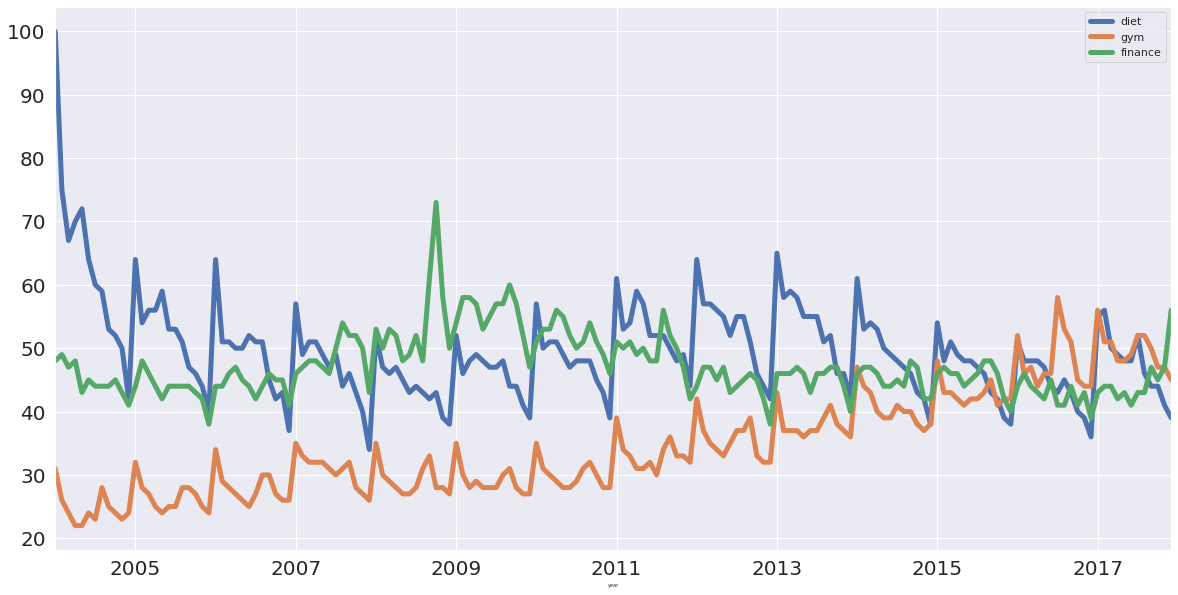

In [106]:
data.plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('year', fontsize=5)

In [107]:
#finding correlation 
data.corr()

,diet,gym,finance
diet,1.000000,-0.100764,-0.034639
gym,-0.100764,1.000000,-0.284279
finance,-0.034639,-0.284279,1.000000


Text(0.5, 0, 'year')

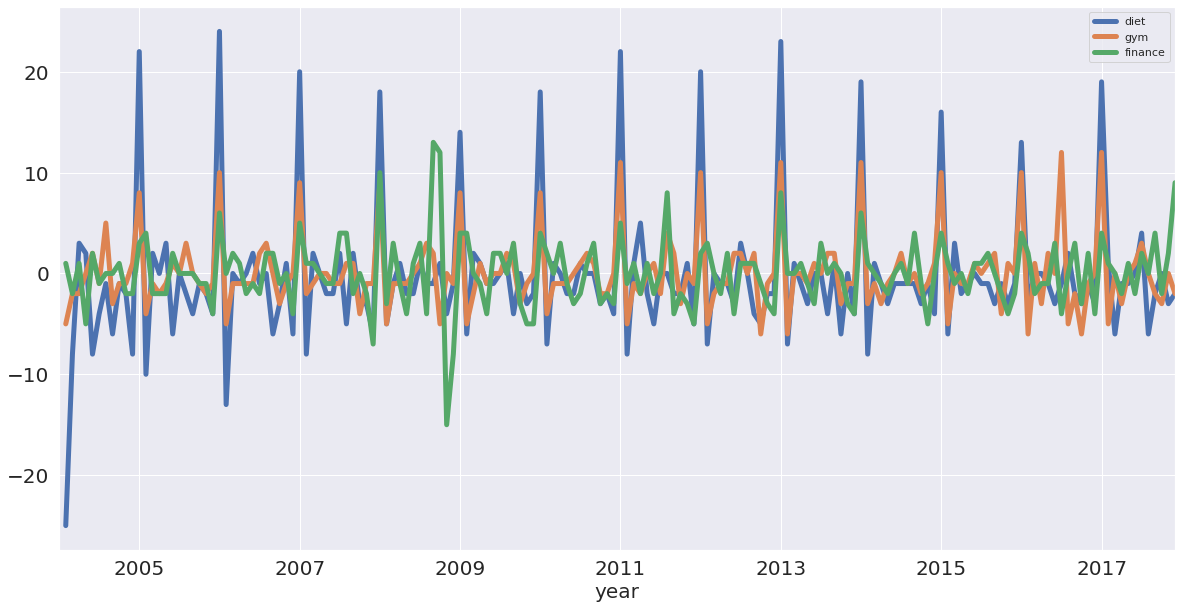

In [111]:
#first order difference of whole data
data.diff().plot(figsize=(20,10), fontsize=20, linewidth=5)
plt.xlabel('year', fontsize=20)

In [117]:
data.diff().corr()

,diet,gym,finance
diet,1.000000,0.758707,0.373828
gym,0.758707,1.000000,0.301111
finance,0.373828,0.301111,1.000000


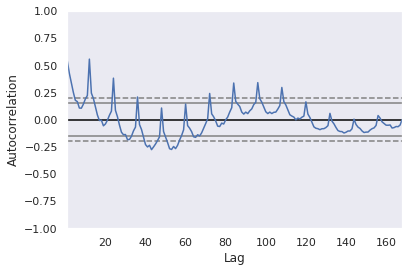

In [120]:
#auto correlatin of diet column
diet = data[['diet']]
pd.plotting.autocorrelation_plot(diet)

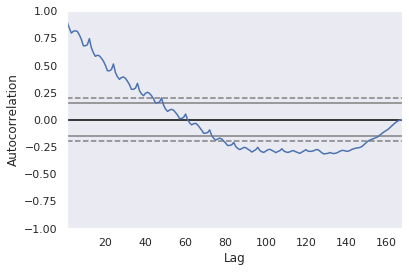

In [121]:
#auto correlation of gym column
gym = data[['gym']]
pd.plotting.autocorrelation_plot(gym)

In [133]:
t_plot = pd.concat([diet,gym], axis=1)
t_plot


,diet,gym
month,,
2004-01-01,100,31
2004-02-01,75,26
2004-03-01,67,24
2004-04-01,70,22
2004-05-01,72,22
...,...,...
2017-08-01,46,52
2017-09-01,44,50
2017-10-01,44,47


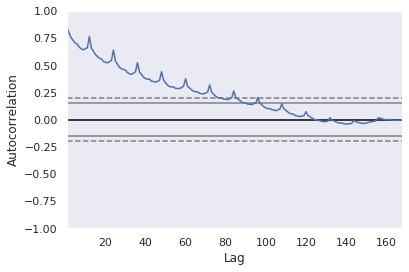

In [135]:
#autocorrelation of diet and gym column
pd.plotting.autocorrelation_plot(t_plot)